In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression

In [2]:
#reading csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#copying df to data
df = pd.read_csv('train.csv')

In [4]:
#requirements
print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 381109, number of features: 12


In [5]:
#checking for unique values
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
#converting float64 Dtype columns into int64 Dtype columns
for i in df.columns:
    if (df[i].dtype == 'float64'):
        df[i] = df[i].astype(np.int64)

In [8]:
#identifying categorical and numerical columns
categorical = []
for i in df.columns:
    if (df[i].dtype == 'object'):
        categorical.append(i)
print(f"Categorical columns are {categorical}.\n")

numerical = []
for i in df.columns:
    if (df[i].dtype == 'int64'):
        numerical.append(i)
print(f"Numerical columns are {numerical}.")

#but the numerical columns aren't always going to be numerical columns just because it is of int datatype
#example - 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Response' are actually categorical!

Categorical columns are ['Gender', 'Vehicle_Age', 'Vehicle_Damage'].

Numerical columns are ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'].


In [9]:
#so categorical -
categorical = ['Gender'
               ,'Driving_License'
               ,'Region_Code'
               ,'Previously_Insured'
               ,'Vehicle_Age'
               ,'Vehicle_Damage'
               ,'Policy_Sales_Channel']

#and numerical -
numerical = ['Age'
            ,'Vintage'
            ,'Annual_Premium']

# Exploratory Data Analysis

### i. Univariate

<AxesSubplot:xlabel='Gender', ylabel='count'>

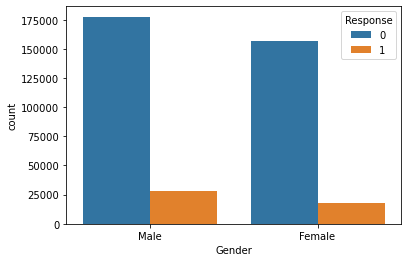

In [10]:
sns.countplot(data = df, x = 'Gender', hue = 'Response')

<AxesSubplot:title={'center':'pie chart of Percentage of target class'}, ylabel='Response'>

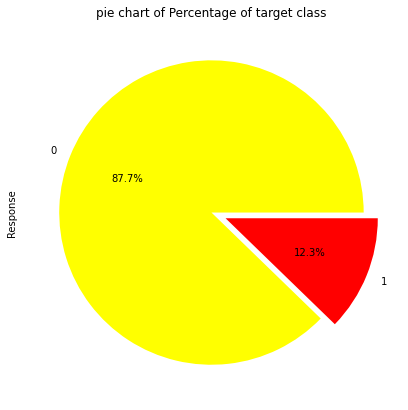

In [11]:
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%'
               ,colors=['yellow','red']
               , figsize = (10,7)
               ,explode = [0,0.1]
               ,title = "pie chart of Percentage of target class")

In [12]:
a = sum((df['Gender'] == 'Male') & (df['Response'] == 1))
b = sum((df['Gender'] == 'Female') & (df['Response'] == 1))
c = sum((df['Gender'] == 'Male') & (df['Response'] == 0))
d = sum((df['Gender'] == 'Female') & (df['Response'] == 0))

print(f"{a} men and {b} women responded positively.\n")
print(f"Wheras {c} men and {d} women said no to insurance.")


28525 men and 18185 women responded positively.

Wheras 177564 men and 156835 women said no to insurance.


<AxesSubplot:xlabel='Gender', ylabel='count'>

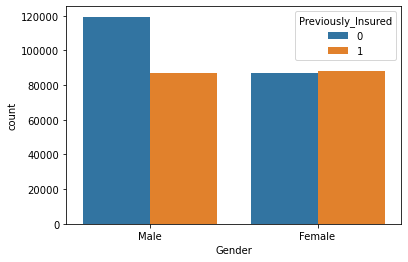

In [13]:
sns.countplot(data=df,x='Gender',hue='Previously_Insured')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

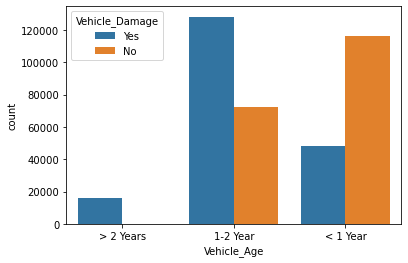

In [14]:
sns.countplot(data=df,x='Vehicle_Age',hue='Vehicle_Damage')

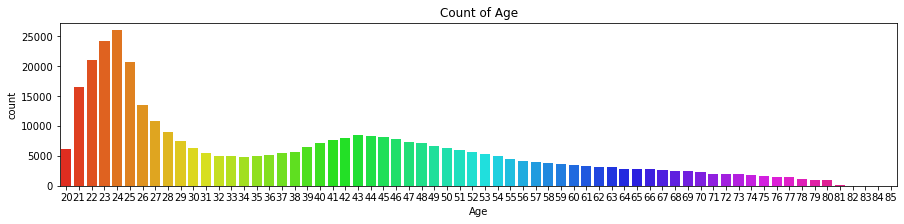

In [15]:
plt.figure(figsize = (15,3))
sns.countplot(x=train['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

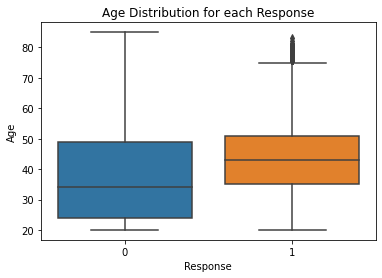

In [16]:
b = sns.boxplot(y='Age', x='Response', data=df);
b.set_title("Age Distribution for each Response");

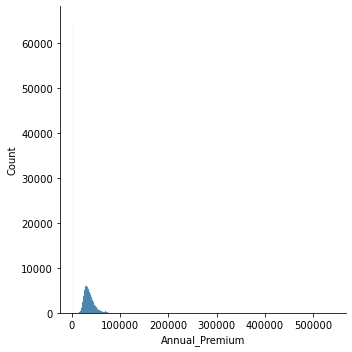

In [17]:
sns.displot(df.Annual_Premium)

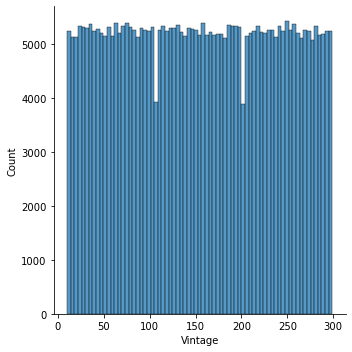

In [18]:
sns.displot(df.Vintage)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

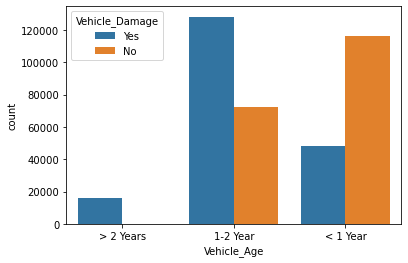

In [19]:
sns.countplot(data=df,x='Vehicle_Age',hue='Vehicle_Damage')

### ii. Bivariate

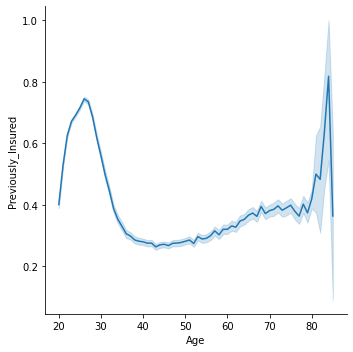

In [20]:
sns.relplot(data=df,x='Age',y='Previously_Insured',kind='line')

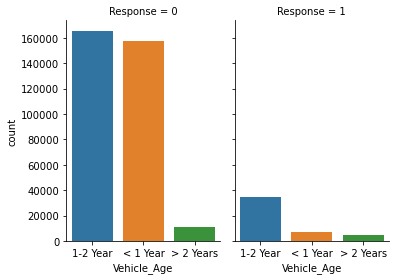

In [21]:
df1=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

sns.catplot(x="Vehicle_Age", y="count",col="Response",data=df1, kind="bar",height=4, aspect=.7);

In [22]:
print(df1)

  Vehicle_Age  Response   count
0    1-2 Year         0  165510
1    1-2 Year         1   34806
2    < 1 Year         0  157584
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4702


# Data Preprocessing

### a. Handling missing data values

In [23]:
#checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Since there are no missing data values, we will move over to the next process.

### b. Outlier Detection and Handling

['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


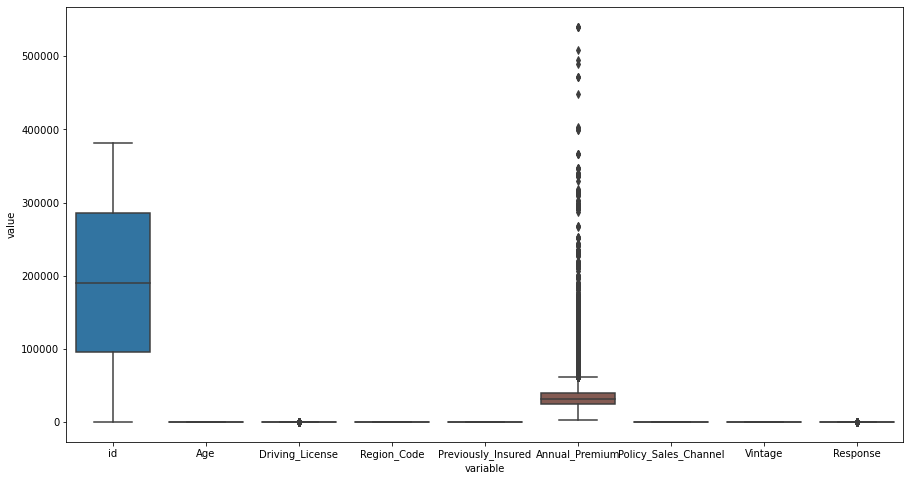

In [24]:
col = list(df.columns)
int64_col = [i for i in col if (df[i].dtype == 'int64')]
print(int64_col)

df1 = pd.DataFrame(data = df, columns = int64_col)

plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

Annual Premium is the only feature where there is noticeably lot of outliers present. Since, it is a categorical vairable we don't have to handle the outlier

### Feature Engineering

In [25]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [26]:
df = pd.get_dummies(df)

In [27]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28,0,40454,26,217,1,0,1,0,0,1,0,1
1,2,76,1,3,0,33536,26,183,0,0,1,1,0,0,1,0
2,3,47,1,28,0,38294,26,27,1,0,1,0,0,1,0,1
3,4,21,1,11,1,28619,152,203,0,0,1,0,1,0,1,0
4,5,29,1,41,1,27496,152,39,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26,1,30170,26,88,0,0,1,1,0,0,1,0
381105,381106,30,1,37,1,40016,152,131,0,0,1,0,1,0,1,0
381106,381107,21,1,30,1,35118,160,161,0,0,1,0,1,0,1,0
381107,381108,68,1,14,0,44617,124,74,0,1,0,0,0,1,0,1


#### Finding Highly correlated features

<AxesSubplot:>

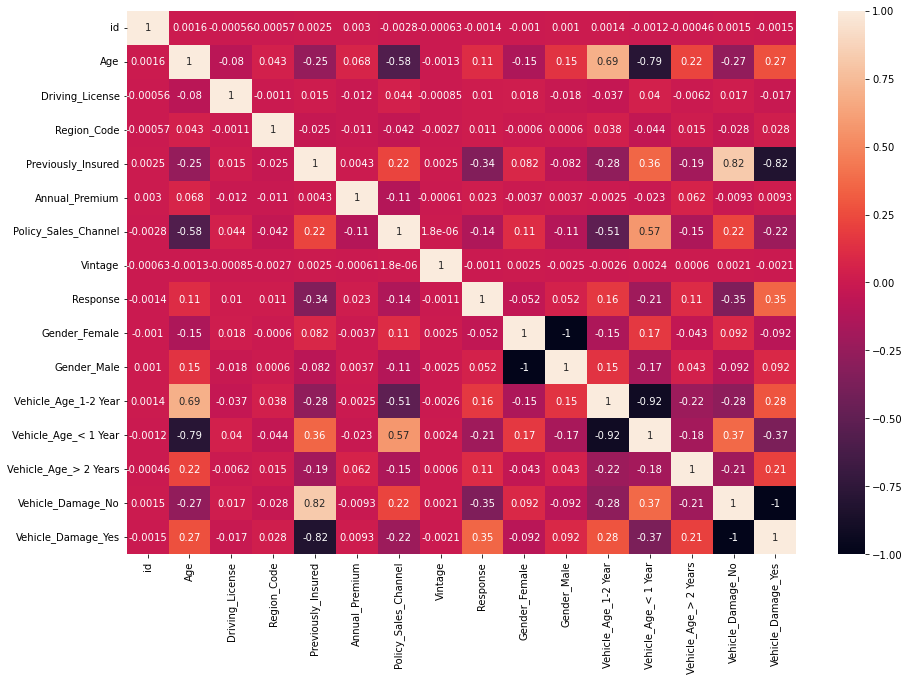

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [29]:
#Highly correlated columns wrt to target columns which can give us better accuracy
hig_corr = df.corr()
hig_corr_features = list(hig_corr.index[abs(hig_corr["Response"]) >= 0.2])
hig_corr_features

['Previously_Insured',
 'Response',
 'Vehicle_Age_< 1 Year',
 'Vehicle_Damage_No',
 'Vehicle_Damage_Yes']

From the above plot we can see correlation among each features. If two features are highly correlated, we can eleminate one of them because they tend to overfit the data and we also need to make sure to consider all the features that highly correlate with the output so that they help in better prediction.

In [30]:
for col in df.columns:
    if col == 'Response':
        continue
    print(f"{col}: {df[col].corr(df['Response'])}\n")

id: -0.0013681501902182431

Age: 0.1111468947124896

Driving_License: 0.010155174594069723

Region_Code: 0.010569855615219465

Previously_Insured: -0.34117046261348355

Annual_Premium: 0.022574695542552148

Policy_Sales_Channel: -0.13904150082911657

Vintage: -0.001050372001989629

Gender_Female: -0.05243991377131617

Gender_Male: 0.05243991377131617

Vehicle_Age_1-2 Year: 0.16431673246189815

Vehicle_Age_< 1 Year: -0.2098782379062273

Vehicle_Age_> 2 Years: 0.10930011085331884

Vehicle_Damage_No: -0.354399543879791

Vehicle_Damage_Yes: 0.354399543879791



### c. Encoding (already handled under feature engineering)

In [31]:
#mapping male to 1 and female to 0
#d = {'Male': 1, 'Female': 0}
#df['Gender'] = df['Gender'].map(d)

In [32]:
#mapping yes to 1 and no to 0
#d = {'Yes': 1, 'No': 0}
#df['Vehicle_Damage'] = df['Vehicle_Damage'].map(d)

In [33]:
#mapping vehicle age
#d = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
#df['Vehicle_Age'] = df['Vehicle_Age'].map(d)

### d. Feature Reduction

In [34]:
df.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [35]:
#droppping 'id' column
df = df.drop(['id'], axis=1)

In [36]:
#droppping 'Driving_License' column
df = df.drop(['Driving_License'], axis=1)

In [37]:
#dropping features with high correlation
df = df.drop(['Gender_Female','Vehicle_Age_< 1 Year','Vehicle_Damage_No'], axis = 1)

### e. Standardization / Normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn import preprocessing

In [39]:
df1 = df.copy()
df1.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes'],
      dtype='object')

In [40]:
scaler = MinMaxScaler()
df1 = df1.drop(['Response'],axis=1) #separating target value
#target value doesn't have to be normalized
df1 = pd.DataFrame(scaler.fit_transform(df1))

In [41]:
df1 = preprocessing.normalize(df1)
pd.DataFrame(df1)

,0,1,2,3,4,5,6,7,8,9
0,0.185357,0.270312,0.000000,0.035324,0.077470,0.359569,0.502008,0.000000,0.502008,0.502008
1,0.486890,0.032604,0.000000,0.032493,0.087213,0.338302,0.565140,0.565140,0.000000,0.000000
2,0.222218,0.288060,0.000000,0.035494,0.082557,0.031469,0.534969,0.000000,0.534969,0.534969
3,0.008390,0.115367,0.545373,0.026368,0.508342,0.364211,0.545373,0.000000,0.000000,0.000000
4,0.087190,0.496501,0.629708,0.029130,0.586950,0.063189,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
381104,0.413351,0.248776,0.497552,0.025492,0.076783,0.134287,0.497552,0.497552,0.000000,0.000000
381105,0.081323,0.376118,0.528598,0.036764,0.492705,0.221316,0.528598,0.000000,0.000000,0.000000
381106,0.008139,0.305210,0.529031,0.031974,0.519235,0.276414,0.529031,0.000000,0.000000,0.000000
381107,0.409661,0.149356,0.000000,0.043332,0.421198,0.122851,0.000000,0.000000,0.554749,0.554749


In [42]:
#to see the heaviness of each column
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(df1)
np.cumsum(pca.explained_variance_ratio_)

array([0.41609531, 0.61584951, 0.78330137, 0.8470802 , 0.90428999,
       0.95156489, 0.98139894, 0.99111763, 0.99921672, 1.        ])

# Modeling

### X and y

In [43]:
df1 = pd.DataFrame(df1)
X = df1.iloc[:, :]
y = df[['Response']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.3)
print(X_train.shape)
print(X_test.shape)

(266776, 10)
(114333, 10)


### Decision Tree Classifier

In [45]:
insurance_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
model_dt = insurance_classifier.fit(X_train, y_train)

In [46]:
y_pred_dt = model_dt.predict(X_test)

In [47]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred_dt))*100} %')
print('\n')
print("Classification Report is: \n",classification_report(y_test,y_pred_dt))
print('\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_dt))
print('\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred_dt))
print('\n')

Accuracy Score: 87.63436628095126 %


Classification Report is: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.00      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



Confusion Matrix: 
 [[100195      0]
 [ 14138      0]]


Mean Squared Error:  0.12365633719048744




C:\Users\Clement\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clement\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clement\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [48]:
log_mod = LogisticRegression(max_iter=10000)
model_lor = log_mod.fit(X_train,y_train.values.ravel())
y_pred_lor = model_lor.predict(X_test)

In [49]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred_lor))*100} %')
print('\n')
print("Classification Report is: \n",classification_report(y_test,y_pred_lor))
print('\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lor))
print('\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred_lor))
print('\n')

Accuracy Score: 87.63261700471429 %


Classification Report is: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.00      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



Confusion Matrix: 
 [[100193      2]
 [ 14138      0]]


Mean Squared Error:  0.123673829952857




### Random Forest Classifier

In [50]:
rf_mod = RandomForestClassifier(random_state=40)
model_rf = rf_mod.fit(X_train,y_train.values.ravel())

y_pred_rf = model_rf.predict(X_test)

In [51]:
model_rf.score(X_test, y_test)

0.8668013609369124

In [52]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred_rf))*100} %')
print('\n')
print("Classification Report is: \n",classification_report(y_test,y_pred_rf))
print('\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rf))
print('\n')
print("Training Score: ",rf_mod.score(X_test,y_test)*100)
print('\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred_rf))
print('\n')

print(rf_mod.get_params())

Accuracy Score: 86.68013609369125 %


Classification Report is: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93    100195
           1       0.37      0.11      0.18     14138

    accuracy                           0.87    114333
   macro avg       0.63      0.54      0.55    114333
weighted avg       0.82      0.87      0.83    114333



Confusion Matrix: 
 [[97487  2708]
 [12521  1617]]


Training Score:  86.68013609369125


Mean Squared Error:  0.13319863906308765


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 40, 'verbose': 0, 'warm_start': False}


### Gradient Boosting Classifier

In [53]:
grad_mod = GradientBoostingClassifier()
model_gb = grad_mod.fit(X_train,y_train.values.ravel())
y_pred_gb = model_gb.predict(X_test)

In [54]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred_gb))*100} %')
print('\n\n')
print("Classification Report is: \n",classification_report(y_test,y_pred_gb))
print('\n\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gb))
print('\n\n')
print("Training Score: ",grad_mod.score(X_test,y_test)*100)
print('\n\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred_gb))
print('\n\n')

print(grad_mod.get_params())
print('\n\n')

Accuracy Score: 87.63174236659582 %



Classification Report is: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.41      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.64      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333




Confusion Matrix: 
 [[100185     10]
 [ 14131      7]]



Training Score:  87.63174236659582



Mean Squared Error:  0.1236825763340418



{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': Fa

# Hyperparameter Tuning

We choose random forest because it provides better score than logistic regression and decision tree in this case.

FOR RANDOM FOREST

In [56]:
parameters = {
    "n_estimators": [50, 200, 400],
    "max_depth": [10, 50, 70]
}

In [61]:
from sklearn.model_selection import GridSearchCV

grid_forest = GridSearchCV(model_rf, parameters, scoring = 'roc_auc', cv = 3, n_jobs =-1)
grid_forest.fit(X_train, y_train.values.ravel())

grid_forest.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=400, random_state=40)

In [62]:
grid_forest.cv_results_

{'mean_fit_time': array([ 34.59547838, 134.86939136, 263.54848735,  51.65767066,
        196.53350409, 343.61601392,  49.09701014, 171.31022016,
        255.71702909]),
 'std_fit_time': array([0.27506359, 0.74309104, 1.9631351 , 0.64666334, 1.01786049,
        2.57722803, 0.68559859, 1.23732388, 2.91641902]),
 'mean_score_time': array([0.74200757, 2.79254055, 5.30215748, 1.6014576 , 6.1045541 ,
        7.0907855 , 1.58444349, 4.58283774, 6.59500416]),
 'std_score_time': array([0.02371945, 0.02909043, 0.05498297, 0.00726351, 0.03620918,
        0.0837588 , 0.020086  , 0.17901841, 0.03681021]),
 'param_max_depth': masked_array(data=[10, 10, 10, 50, 50, 50, 70, 70, 70],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 200, 400, 50, 200, 400, 50, 200, 400],
              mask=[False, False, False, False, False, False, False, False,
       